<img src="https://camo.githubusercontent.com/cc5541fa8bc6f822cb8d5b4261a23f20ec8321f4/68747470733a2f2f757365722d696d616765732e67697468756275736572636f6e74656e742e636f6d2f373036353430312f33393131393438362d34373138653338362d343665632d313165382d396663332d3532353061343965663537302e706e67">

---

# 3- Camera manipulation with OpenCV

Import necessary libraries:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

Now we can define a `CAMERA` variable and start getting frames within a `while` loop as follows:

In [3]:
# get the reference to the webcam
CAMERA = cv2.VideoCapture(0)

while(True):
    # read a new frame
    _, frame = CAMERA.read()

    # show the frame
    cv2.imshow("Capturing frames", frame)

    # quit camera if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

CAMERA.release()
cv2.destroyAllWindows()

Let's go deeper and try to custom that camera recording.
- Rescaling the output frame
- Flipping it to achieve mirror screen
- Add a green rectangle on our region of interest _(ROI)_

In [4]:
# get the reference to the webcam
CAMERA = cv2.VideoCapture(0)
HEIGHT = 500

while(True):
    # read a new frame
    _, frame = CAMERA.read()
    
    # flip the frame
    frame = cv2.flip(frame, 1)

    # rescaling camera output
    aspect = frame.shape[1] / float(frame.shape[0])
    res = int(aspect * HEIGHT) # landscape orientation - wide image
    frame = cv2.resize(frame, (res, HEIGHT))

    # add rectangle
    cv2.rectangle(frame, (300, 75), (650, 425), (0, 255, 0), 2)

    # show the frame
    cv2.imshow("Capturing frames", frame)

    # quit camera if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

CAMERA.release()
cv2.destroyAllWindows()

Now let's make some changes to take and save a picture when clicking `S` key:

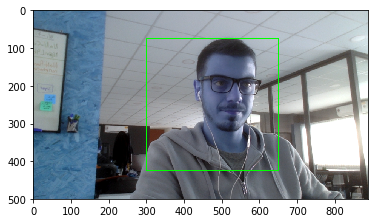

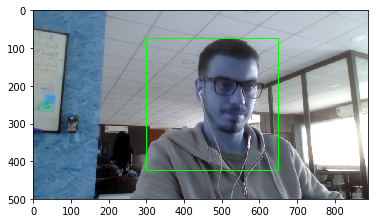

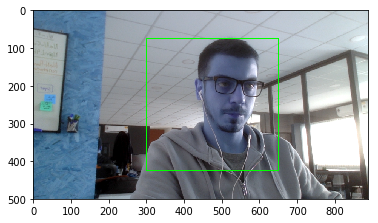

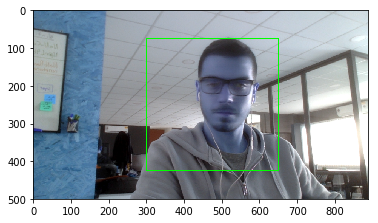

In [32]:
# get the reference to the webcam
CAMERA = cv2.VideoCapture(0)
HEIGHT = 500
RAW_FRAMES = []

while(True):
    # read a new frame
    _, frame = CAMERA.read()
    
    # flip the frame
    frame = cv2.flip(frame, 1)

    # rescaling camera output
    aspect = frame.shape[1] / float(frame.shape[0])
    res = int(aspect * HEIGHT) # landscape orientation - wide image
    frame = cv2.resize(frame, (res, HEIGHT))

    # add rectangle
    cv2.rectangle(frame, (300, 75), (650, 425), (0, 255, 0), 2)

    # show the frame
    cv2.imshow("Capturing frames", frame)

    key = cv2.waitKey(1)

    # quit camera if 'q' key is pressed
    if key & 0xFF == ord("q"):
        break
    elif key & 0xFF == ord("s"):
        # save the frame
        RAW_FRAMES.append(frame)
        
        # preview the frame
        plt.imshow(frame)
        plt.show()

CAMERA.release()
cv2.destroyAllWindows()

Amazing! At this point we have a lot of pictures, we now need to crop them to work only with our green _ROI_.

First take a look at raw frames:

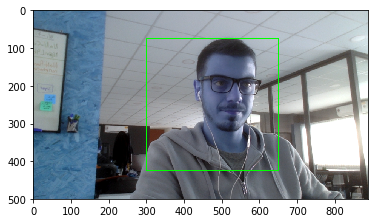

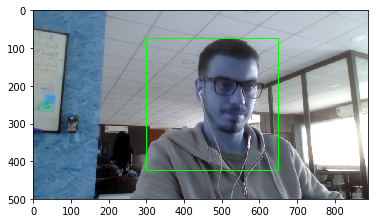

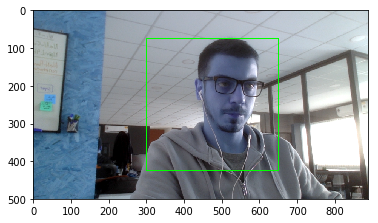

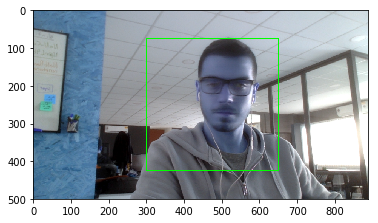

In [33]:
# show raw frames
for frame in RAW_FRAMES:
    plt.imshow(frame)
    plt.show()

We need to crop the green area (_ROI_) and parse to RGB format.

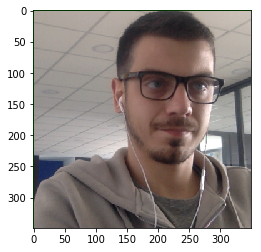

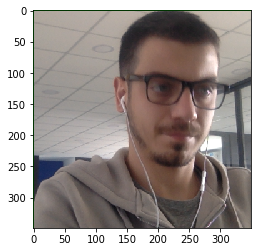

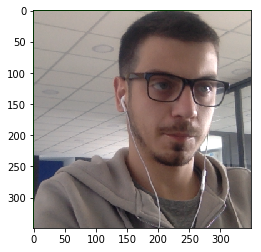

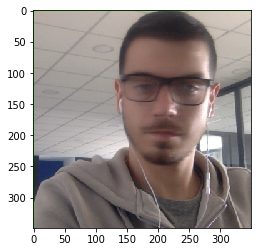

In [34]:
IMAGES = []

for frame in RAW_FRAMES:
    # get ROI
    roi = frame[75+1:425-1, 300+1:650-1]
    
    # parse BRG to RGB
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)

    IMAGES.append(roi)
    
    plt.imshow(roi)
    plt.show()

Let's see how many images we have and its dimensions:

In [40]:
len(IMAGES)

4

In [41]:
IMAGES[0].shape

(349, 349, 3)

We have just created our images dataset 🎉

<img src="https://camo.githubusercontent.com/53f6fb6ccefefd87dc93af20b8e7972573de9828/68747470733a2f2f757365722d696d616765732e67697468756275736572636f6e74656e742e636f6d2f373036353430312f33393131393531382d35396661353163652d343665632d313165382d383530332d3566383133363535386632622e706e67">
<a href="https://rmotr.com" target="_blank">rmotr.com</a>